In [ ]:
import numpy as np
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.CompositeModel as gc
import ndlib.models.compartments as cpm
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

# Importing all the necessaries libraries

import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm
import ndlib.models.epidemics as ep

ModuleNotFoundError: ignored

In [ ]:
!pip install ndlib

     |████████████████████████████████| 110 kB 33.4 MB/s 
     |████████████████████████████████| 3.2 MB 36.2 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.8-py3-none-any.whl size=9070 sha256=a83df708201bfc9acef78f346d98dd3f651637b81b48bae9593ced601acb5533
  Stored in directory: /root/.cache/pip/wheels/15/86/ef/b8bcdfbcb1c489771ad256c7cd1eb4971cdb7f3f670938b798
Successfully built python-igraph


In [ ]:
g = nx.barabasi_albert_graph(100000, 2)

# Model Selection
model = ep.SIRModel(g)

In [ ]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.2)
config.add_model_parameter('gamma', 0.15)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [ ]:


# Compartment definition
beta_e = [0.1,0.5,0.9]
beta_x = [0.1,0.5,0.9]
gamma = [0.1,0.5,0.9]

for be in beta_e:
    for bx in beta_x:
        for g in gamma:
            
            gr = nx.barabasi_albert_graph(1000, 2)
            model = gc.CompositeModel(gr)

            model.add_status("Susceptible")
            model.add_status("Infected_Endo")
            model.add_status("Infected")
            model.add_status("Removed")
            
            #beta_e
            c1 = cpm.NodeStochastic(be, triggering_status="Infected_Endo")
            c2 = cpm.NodeStochastic(be, triggering_status="Infected")

            #beta_x
            c3 = cpm.NodeStochastic(bx)

            #gamma
            c4 = cpm.NodeStochastic(g)

            # Rule definition
            model.add_rule("Susceptible", "Infected_Endo", c1)
            model.add_rule("Susceptible", "Infected_Endo", c2)
            model.add_rule("Infected", "Removed", c4)
            model.add_rule("Infected_Endo", "Removed", c4)
            model.add_rule("Susceptible", "Infected", c3)


            # Model initial status configuration
            config = mc.Configuration()
            config.add_model_parameter('fraction_infected', 0)

            model.set_initial_status(config)

            # Simulation
            iterations = model.iteration_bunch(100)
            trends = model.build_trends(iterations)

            

            viz = DiffusionTrend(model, trends)
            p = viz.plot(width=800, height=400)
            show(p)

In [ ]:
# Simulation
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

In [ ]:
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

In [ ]:
gr = nx.barabasi_albert_graph(100000, 2)
model = gc.CompositeModel(gr)

model.add_status("Susceptible")
model.add_status("Infected_Endo")
model.add_status("Infected")
model.add_status("Removed")

#beta_e
c1 = cpm.NodeStochastic(0.2, triggering_status="Infected_Endo")
c2 = cpm.NodeStochastic(0.2, triggering_status="Infected")

#beta_x
c3 = cpm.NodeStochastic(0.1)

#gamma
c4 = cpm.NodeStochastic(0.15)

# Rule definition
model.add_rule("Susceptible", "Infected_Endo", c1)
model.add_rule("Susceptible", "Infected_Endo", c2)
model.add_rule("Infected", "Removed", c4)
model.add_rule("Infected_Endo", "Removed", c4)
model.add_rule("Susceptible", "Infected", c3)


# Model initial status configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0)

model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)
print(trends[0]['trends']['node_count'][0]+trends[0]['trends']['node_count'][0])


"""viz = DiffusionTrend(model, trends)
p = viz.plot(width=800, height=400)
show(p)"""

/usr/local/lib/python3.7/dist-packages/ndlib/models/DiffusionModel.py:170: UserWarning: The fraction_infected value is too low given the number of nodes of the selected graph: a single node will be set as infected
  "The fraction_infected value is too low given the number of nodes of the selected graph: a "


[99999, 90132, 76195, 60055, 44768, 32272, 23152, 16671, 12182, 9040, 6912, 5398, 4319, 3569, 3032, 2568, 2226, 1980, 1764, 1527, 1361, 1223, 1104, 989, 881, 787, 709, 648, 599, 550, 490, 433, 378, 330, 301, 275, 248, 229, 208, 187, 170, 153, 143, 129, 116, 108, 97, 85, 79, 68, 61, 56, 51, 49, 42, 38, 34, 31, 28, 25, 23, 22, 19, 17, 15, 15, 13, 11, 10, 9, 9, 7, 7, 7, 7, 5, 4, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99999, 90132, 76195, 60055, 44768, 32272, 23152, 16671, 12182, 9040, 6912, 5398, 4319, 3569, 3032, 2568, 2226, 1980, 1764, 1527, 1361, 1223, 1104, 989, 881, 787, 709, 648, 599, 550, 490, 433, 378, 330, 301, 275, 248, 229, 208, 187, 170, 153, 143, 129, 116, 108, 97, 85, 79, 68, 61, 56, 51, 49, 42, 38, 34, 31, 28, 25, 23, 22, 19, 17, 15, 15, 13, 11, 10, 9, 9, 7, 7, 7, 7, 5, 4, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'viz = DiffusionTrend(model, trends)\np = viz.plot(width=800, height=400)\nshow(p)'

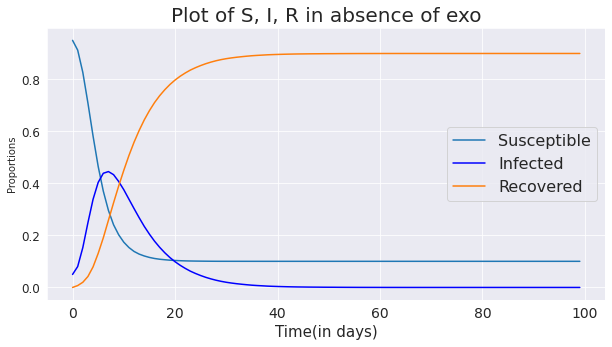

In [ ]:
# Plotting the result

plt.figure(figsize = (10,5))
plt.plot([i/100000 for i in trends[0]['trends']['node_count'][0]], label = 'Susceptible')
#plt.plot([j/100000 for j in [sum(i) for i in zip(trends[0]['trends']['node_count'][1],trends[0]['trends']['node_count'][2])]] , label = 'Infected', c='blue')
plt.plot([j/100000 for j in trends[0]['trends']['node_count'][1]] , label = 'Infected', c='blue')
plt.plot([j/100000 for j in trends[0]['trends']['node_count'][2]], label = 'Recovered')
#plt.plot(t, solution1[:,3], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Plot of S, I, R in absence of exo", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions", size=10)
plt.xticks(size=14)
plt.yticks(size=12)
#plt.savefig('E:\\Docs & Files\\SMA\\4. Exo-SIR Model\\pred_Exo-SIR_TN_i_x.png')
plt.show()